In [20]:
%load_ext autoreload
%autoreload 2
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the training data into feature matrix, class labels, and event ids:

In [334]:
from proj1_helpers import *
DATA_TRAIN_PATH = '/Users/ines/Documents/SV/SV-MA3/ML_course/projects/project1/data/train.csv' 
y_pre, tX_pre, ids = load_csv_data(DATA_TRAIN_PATH)

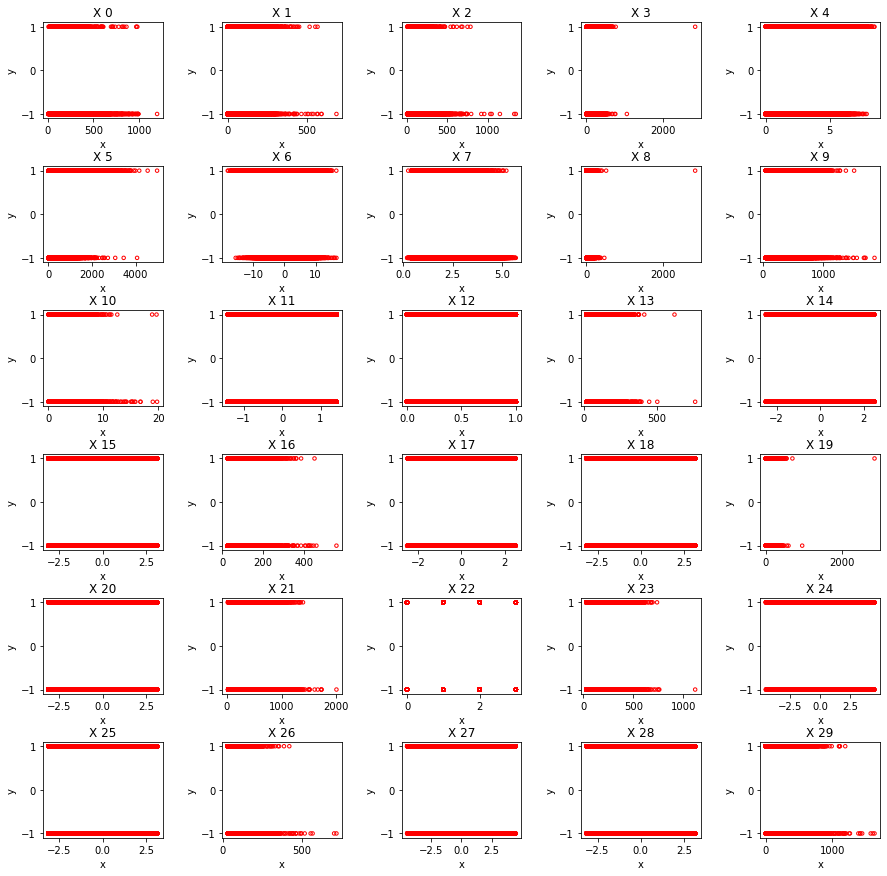

In [331]:
# Exploring data 
# define the structure of the figure
num_row = 6
num_col = 5
f, axs = plt.subplots(num_row, num_col,figsize=(15,15))

for i in range(tX_pre.shape[1]):
    ax = axs[i // num_col][i % num_col]
    ax.scatter(tX[:,i], y, color='b', s=12, facecolors='none', edgecolors='r')
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_title("X " + str(i))

plt.subplots_adjust(wspace = .5, hspace = .5)


In [612]:
####################################
# Test LS without any pre-processing
####################################


x_tr, x_te, y_tr, y_te = split_data(tX_pre, y_pre, 0.8, seed=1)

degrees = np.linspace(0, 1, 2)

w_list = np.empty(degrees.size)
mse_list = np.empty(degrees.size)
accuracies = np.empty(degrees.size)

parameters_LS = {
  "model": "LS",
}

for d in degrees:
    idx = int(d-1)
    
    if d != 0:
        # form data with polynomial degree:
        x_tr_p = build_poly(x_tr, d)
        x_te_p = build_poly(x_te, d)
    else : 
        x_tr_p = x_tr
        x_te_p = x_te
        
    w_list, mse_list = least_squares(y_tr, x_tr_p)
    accuracies[idx] = compute_accuracy(x_te_p, y_te, w_list, parameters_LS)
    if d == 0:
        print("LS without bias, accuracy = ", accuracies[idx])
    else :
        print("LS with bias, accuracy = ", accuracies[idx])


LS without bias, accuracy =  74.402
LS with bias, accuracy =  74.468


In [633]:
########################################
# LS with or without bias test on 20%
########################################

x_tr, x_te, y_tr, y_te = split_data(tX_post, y_post, 0.8, seed=1)

degrees = [0,1]


parameters_LS = {
  "model": "LS",
}

for d in degrees:
    
    if d != 0:
        # form data with polynomial degree:
        x_tr_p = build_poly(x_tr, d)
        x_te_p = build_poly(x_te, d)
    else : 
        x_tr_p = x_tr
        x_te_p = x_te
        
    w_list, mse_list = least_squares(y_tr, x_tr_p)
    accuracy = compute_accuracy(x_te_p, y_te, w_list, parameters_LS)
    if d == 0:
        print("LS without bias, accuracy = ", accuracy)
    else :
        print("LS with bias, accuracy = ", accuracy)


LS without bias, accuracy =  71.662
LS with bias, accuracy =  74.42999999999999


In [735]:
#############################
#### Preprocessing
#############################

from implementations import *
print("Before pre-processing")
print("tX shape :", tX_pre.shape, "y shape :", y_pre.shape, ids.shape)
print("tX max", np.max(tX_pre), "tX min", np.min(tX_pre), "tX mean", 
      np.mean(tX_pre), "tX std", np.std(tX_pre))

tX_post = remove_aberrant_values(tX_pre)
tX_post = remove_aberrant_features(tX_post)
tX_post = rescale_outliers(tX_post)
tX_post, _ , _ = standardize(tX_post)


print("After pre processing")
print("tX shape :", tX_post.shape)
print("tX max", np.max(tX_post, axis = 0),"tX min", np.min(tX_post, axis = 0), "tX mean", 
      np.mean(tX_post,axis=0), "tX std", np.std(tX_post, axis=0))




Before pre-processing
tX shape : (250000, 30) y shape : (250000,) (250000,)
tX max 4974.979 tX min -999.0 tX mean -175.14058052786658 tX std 433.5002560560245
After pre processing
tX shape : (250000, 29)
tX max [3.8534182  3.16961783 3.6745966  3.34272795 3.22661909 4.12617172
 3.5689557  3.0078628  3.53980282 3.34815951 3.41255977 1.29216437
 2.52241378 3.64549188 2.06574596 1.7339506  3.5459201  1.99410918
 1.70562811 3.5478852  1.73936983 3.25794883 3.66173588 3.00245177
 2.2443359  4.26113493 3.11558815 3.01818114 3.34580512] tX min [-2.66717556 -1.45591786 -2.18356859 -0.98241519 -2.7206938  -2.20506016
 -3.58804075 -2.77130357 -0.96809515 -1.05128704 -1.83335833 -1.07717342
 -2.13397589 -0.96722342 -2.04931693 -1.72495538 -1.06340448 -1.96484789
 -1.75356687 -1.45137192 -1.7282021  -1.65536032 -1.36702026 -3.00243167
 -2.22740716 -2.19232317 -3.11601287 -3.01804561 -0.80180281] tX mean [-6.14107876e-16  3.28356009e-16 -4.39939640e-16 -1.19428023e-16
 -1.88293825e-16 -5.32907052e-

## Do your thing crazy machine learning thing here :) ...

In [676]:
#############################
#### Innocent test
#############################

import datetime
from implementations import *

initial_w = np.zeros(tX_post.shape[1])
max_iters = 500
gamma = 0.03
ratio = 0.8
batch_size = 100

x_tr_ls, x_te_ls, y_tr_ls, y_te_ls = split_data(tX_pre, y_pre, ratio, seed=1)
param = {"model" : 'LS'}
start_time_ls = datetime.datetime.now()
w_ls, mse_ls = least_squares(y_tr_ls, x_tr_ls)
end_time_ls = datetime.datetime.now()
execution_time_ls = (end_time_ls - start_time_ls).total_seconds()


x_tr, x_te, y_tr, y_te = split_data(tX_post, y_post, ratio, seed=1)
param = {"model" : 'GD'}
start_time_GD = datetime.datetime.now()
w_GD, loss_GD = least_squares_GD(y_tr, x_tr, initial_w, max_iters, gamma)
end_time_GD = datetime.datetime.now()
execution_time_GD = (end_time_GD - start_time_GD).total_seconds()

param = {"model" : 'SGD'}
start_time_SGD = datetime.datetime.now()
w_SGD, loss_SGD = least_squares_SGD(y_tr, x_tr, initial_w, max_iters, batch_size, gamma)
end_time_SGD = datetime.datetime.now()
execution_time_SGD = (end_time_SGD - start_time_SGD).total_seconds()
print('LS : accuracy :', compute_accuracy(x_te_ls, y_te_ls, w_ls, param), 'execution time : ', execution_time_ls)
print('GD : accuracy :', compute_accuracy(x_te, y_te, w_GD, param), 'execution time : ', execution_time_GD)
print('SGD : accuracy :', compute_accuracy(x_te, y_te ,w_SGD, param), 'execution time : ', execution_time_SGD)

#weights = w_ls
# (125000, 30) (125000, 30) (125000,) (125000,)
# LS : accuracy : 71.76559999999999 execution time :  0.006621
# GD : accuracy : 71.5784 execution time :  2.740375
# SGD : accuracy : 71.4608 execution time :  15.259046

# LS : accuracy : 71.7992 execution time :  0.007241
# GD : accuracy : 71.8664 execution time :  2.694537
# SGD : accuracy : 71.6488 execution time :  0.469522

LS : accuracy : 74.402 execution time :  0.011019
GD : accuracy : 71.872 execution time :  6.273641
SGD : accuracy : 71.824 execution time :  0.886801


In [677]:
#########
# GD
#########
gammas = np.logspace(-3, -1, 3)
degrees = np.linspace(0, 1, 2)
max_iters = 200
k_fold = 5

parameters_GD = {
  "model": "GD",
  "param": [gammas, max_iters],
}


rmses_GD, accuracy_GD = best_degree_selection(tX_post, y_post, degrees, k_fold, parameters_GD, seed = 1)

Method =  GD
Degree =  0.0
Progress :  0.0  % 
Degree =  1.0
Progress :  50.0  % 
The method used is :  GD
The best degree is 1.0  best parameter is 0.1  with RMSE =  0.8190225511416586 and accuracy =  74.8776


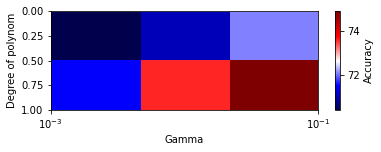

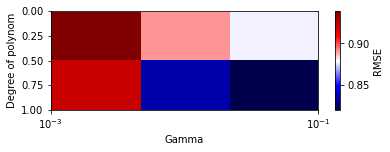

[[70.4304 71.12   72.0996]
 [71.5264 73.5944 74.8776]]
[[0.93933379 0.89140751 0.87738887]
 [0.92194175 0.8350661  0.81902255]]


In [678]:
plt.subplot(211)
plt.imshow(accuracy_GD, extent=[gammas[0],gammas[-1], degrees[-1],degrees[0]],aspect = 'auto',cmap ='seismic')
plt.xlabel('Gamma')
plt.ylim([degrees[-1],degrees[0]])
plt.xscale('symlog')
plt.ylabel('Degree of polynom')
plt.colorbar(label = 'Accuracy')
plt.show()

plt.subplot(212)
plt.imshow(rmses_GD, extent=[gammas[0],gammas[-1], degrees[-1],degrees[0]],aspect = 'auto',cmap ='seismic')
plt.xlabel('Gamma')
plt.ylim([degrees[-1],degrees[0]])
plt.xscale('symlog')
plt.ylabel('Degree of polynom')
plt.colorbar(label = 'RMSE')
plt.show()

print(accuracy_GD)
print(rmses_GD)

# accuracy of 74.44 with gamma = 0.2782559402207124
# D = 1
#  l = 0.01 => A = 73%, RMSE = 0.84
# D = 2
#  l = 0.001 => A = 71.7%, RMSE = 0.8673

# [[70.696  71.244  73.0068]
#  [69.424  71.728  42.712 ]]
# [[0.98919378 0.92666649 0.84090761]
#  [0.96245385 0.86734436        inf]]


In [680]:
#########
# Test GD
#########


degree = 1
gamma = 0.1
initial_w = np.zeros(int(x_tr.shape[1] * degree + 1))
max_iters = 1000


param = {
  "model": "GD",
}

x_tr, x_te, y_tr, y_te = split_data(tX_post, y_post, 0.8, seed=1)

x_tr_p = build_poly(x_tr, degree)
x_te_p = build_poly(x_te, degree)


w, mse = least_squares_GD(y_tr, x_tr_p, initial_w, max_iters, gamma)
accuracy = compute_accuracy(x_te_p, y_te, w, param)

print("Test model : ", param["model"], "degree = ", degree, "param = ", gamma, "accuracy = ", accuracy, "RMSE =", np.sqrt(2*mse))


Test model :  GD degree =  1 param =  0.1 accuracy =  75.062 RMSE = 0.8181439937911399


In [681]:
#########
# SGD
#########
gammas = np.logspace(-4, -2, 3)
degrees = np.linspace(1, 2, 2)
max_iters = 1000
k_fold = 5
batch_size = 1

parameters_SGD = {
  "model": "SGD",
  "param": [gammas, max_iters, batch_size],
}

rmses_SGD, accuracy_SGD = best_degree_selection(tX_post, y_post, degrees, k_fold, parameters_SGD, seed = 1)

Method =  SGD
Degree =  1.0
Progress :  0.0  % 
Degree =  2.0
Progress :  50.0  % 
The method used is :  SGD
The best degree is 2.0  best parameter is 0.001  with RMSE =  0.8382226573967652 and accuracy =  75.7756


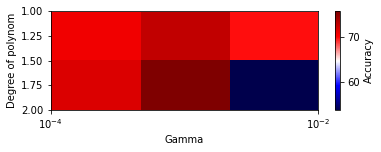

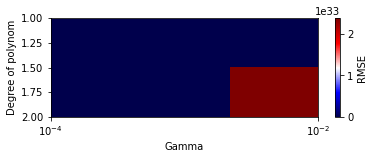

[[70.8244 72.8904 69.9452]
 [71.7904 75.7756 53.7396]]
[[9.52767009e-01 8.54945424e-01 9.22082004e-01]
 [8.76042495e-01 8.38222657e-01 2.38156667e+33]]
0.8382226573967652


In [682]:
plt.subplot(211)
plt.imshow(accuracy_SGD, extent=[gammas[0],gammas[-1], degrees[-1],degrees[0]],aspect = 'auto',cmap ='seismic')
plt.xlabel('Gamma')
plt.ylim([degrees[-1],degrees[0]])
plt.xscale('symlog')
plt.ylabel('Degree of polynom')
plt.colorbar(label = 'Accuracy')
plt.show()

plt.subplot(212)
plt.imshow(rmses_SGD, extent=[gammas[0],gammas[-1], degrees[-1],degrees[0]],aspect = 'auto',cmap ='seismic')
plt.xlabel('Gamma')
plt.ylim([degrees[-1],degrees[0]])
plt.xscale('symlog')
plt.ylabel('Degree of polynom')
plt.colorbar(label = 'RMSE')
plt.show()

print(accuracy_SGD)
print(rmses_SGD)
idx = np.argwhere(rmses_SGD == np.min(rmses_SGD))
idx = np.squeeze(idx)
print(rmses_SGD[idx[0],idx[1]])

# [[69.3452 70.5404 68.7576]
#  [68.4972 64.2316 51.4024]]
# [[9.88713702e-01 9.30045726e-01 9.39897353e-01]
#  [9.82841886e-01 4.04586806e+00 2.66499874e+08]]

In [684]:
#########
# Test SGD
#########


degree = 2
gamma = 0.001
initial_w = np.zeros(int(x_tr.shape[1] * degree + 1))
max_iters = 1000
batch_size = 1


param = {
  "model": "SGD",
}

x_tr, x_te, y_tr, y_te = split_data(tX_post, y_post, 0.8, seed=1)

x_tr_p = build_poly(x_tr, degree)
x_te_p = build_poly(x_te, degree)


w, mse = least_squares_SGD(y_tr, x_tr_p, initial_w, max_iters, batch_size, gamma)
accuracy = compute_accuracy(x_te_p, y_te, w, param)

print("Test model : ", param["model"], "degree = ", degree, "param = ", gamma, "accuracy = ", accuracy, "RMSE =", np.sqrt(2*mse))



Test model :  SGD degree =  2 param =  0.001 accuracy =  76.254 RMSE = 0.814209270484465


In [736]:
#########
# LS
#########
from implementations import *

degrees = np.linspace(1, 20, 20)
k_fold = 5

parameters_LS = {
  "model": "LS",
}

rmses_LS_1, accuracy_LS_1 = best_degree_selection(tx_2, y_post, degrees, k_fold, parameters_LS, seed = 56)

Method =  LS
Degree =  1.0
Progress :  0.0  % 
Degree =  2.0
Progress :  5.0  % 
Degree =  3.0
Progress :  10.0  % 
Degree =  4.0
Progress :  15.0  % 
Degree =  5.0
Progress :  20.0  % 
Degree =  6.0
Progress :  25.0  % 
Degree =  7.0
Progress :  30.0  % 
Degree =  8.0
Progress :  35.0  % 
Degree =  9.0
Progress :  40.0  % 
Degree =  10.0
Progress :  45.0  % 
Degree =  11.0
Progress :  50.0  % 
Degree =  12.0
Progress :  55.00000000000001  % 
Degree =  13.0
Progress :  60.0  % 
Degree =  14.0
Progress :  65.0  % 
Degree =  15.0
Progress :  70.0  % 
Degree =  16.0
Progress :  75.0  % 
Degree =  17.0
Progress :  80.0  % 
Degree =  18.0
Progress :  85.0  % 
Degree =  19.0
Progress :  90.0  % 
Degree =  20.0
Progress :  95.0  % 
The method used is :  LS
The best degree is 17.0  with RMSE =  0.7336377210030639 and accuracy =  81.9412


The best degree is :
[0.81797141 0.76444826 0.74437997 0.73756148 0.73621991 0.73562116
 0.73516545 0.73485096 0.73459651 0.73453951 0.73435819 0.73422742
 0.73395639 0.73391372 0.73382475 0.73376161 0.73363772 0.73427778
 0.73372754 0.73701944]
[75.0796 80.1728 81.3072 81.7224 81.7932 81.846  81.8756 81.8876 81.9296
 81.9084 81.9004 81.9352 81.9236 81.934  81.9204 81.9444 81.9412 81.9016
 81.9284 81.7456]


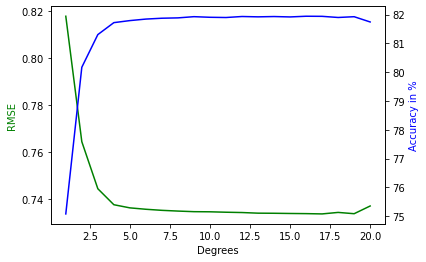

In [673]:
print("The best degree is :", )

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
stop = 20

ax1.plot(degrees[:stop], rmses_LS_1[:stop], 'g-')
ax2.plot(degrees[:stop], accuracy_LS_1[:stop], 'b-')

ax1.set_xlabel('Degrees')
ax1.set_ylabel('RMSE', color='g')
ax2.set_ylabel('Accuracy in %', color='b')

print(rmses_LS_1)
print(accuracy_LS_1)

# We choose the degree 7, RMSE = 0.73516545, accuracy = 81.8756.
# The simplest model is preferred
# Best model overall : degree 17, RMSE = 0.7336377210030639, accuracy = 81.9412

In [698]:
#########
# Test LS
#########


degree = 7


param = {
  "model": "LS",
}

x_tr, x_te, y_tr, y_te = split_data(tX_post, y_post, 0.8, seed=1)

x_tr_p = build_poly(x_tr, degree)
x_te_p = build_poly(x_te, degree)


w, mse = least_squares(y_tr, x_tr_p)
accuracy = compute_accuracy(x_te_p, y_te, w, param)

print("Test model : ", param["model"], "degree = ", degree, "accuracy = ", accuracy, "RMSE =", np.sqrt(2*mse))

# Test model :  LS degree =  1 accuracy =  74.42999999999999 RMSE = 0.8247926264289527


Test model :  LS degree =  7 accuracy =  81.93 RMSE = 0.7323868012816129


In [695]:
#########
# Ridge
#########

degrees = np.linspace(6, 9, 4)
lambdas = np.logspace(-5, -2, 3)
k_fold = 5

parameters_ridge = {
  "model": "ridge",
  "param": lambdas,
}

rmses_ridge, accuracy_ridge = best_degree_selection(tX_post, y_post, degrees, k_fold, parameters_ridge, seed = 1)

Method =  ridge
Degree =  6.0
Progress :  0.0  % 
Degree =  7.0
Progress :  25.0  % 
Degree =  8.0
Progress :  50.0  % 
Degree =  9.0
Progress :  75.0  % 
The method used is :  ridge
The best degree is 9.0  best parameter is 1e-05  with RMSE =  0.7322672580534393 and accuracy =  82.0684


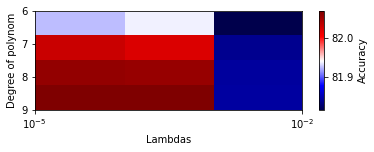

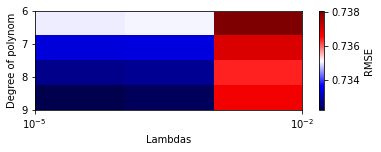

[[81.9244 81.938  81.814 ]
 [82.0312 82.0224 81.838 ]
 [82.0576 82.0564 81.8436]
 [82.0684 82.0676 81.8444]]
[[0.73503978 0.73508341 0.73802802]
 [0.73342017 0.73345633 0.73699243]
 [0.73278206 0.732839   0.73638903]
 [0.73226726 0.73239284 0.73671973]]


In [699]:
plt.subplot(211)
plt.imshow(accuracy_ridge, extent=[lambdas[0],lambdas[-1], degrees[-1],degrees[0]],aspect = 'auto',cmap ='seismic')
plt.xlabel('Lambdas')
plt.ylim([degrees[-1],degrees[0]])
plt.xscale('symlog')
plt.ylabel('Degree of polynom')
plt.colorbar(label = 'Accuracy')
plt.show()

plt.subplot(212)
plt.imshow(rmses_ridge, extent=[lambdas[0],lambdas[-1], degrees[-1],degrees[0]],aspect = 'auto',cmap ='seismic')
plt.xlabel('Lambdas')
plt.ylim([degrees[-1],degrees[0]])
plt.xscale('symlog')
plt.ylabel('Degree of polynom')
plt.colorbar(label = 'RMSE')
plt.show()

print(accuracy_ridge)
print(rmses_ridge)

# We choose degree 7, lambda = 0.01, RMSE = 0.73699243, accuracy = 81.838
# Even if it's not the smallest RMSE and the highest accuracy, we choose this simplest model

In [703]:
#########
# Test ridge
#########


degree = 7
lambda_ = 0.01


param = {
  "model": "ridge",
}

x_tr, x_te, y_tr, y_te = split_data(tX_post, y_post, 0.8, seed=1)

x_tr_p = build_poly(x_tr, degree)
x_te_p = build_poly(x_te, degree)


w, mse = ridge_regression(y_tr, x_tr_p, lambda_)
accuracy = compute_accuracy(x_te_p, y_te, w, param)

print("Test model : ", param["model"], "degree = ", degree, "accuracy = ", accuracy, "RMSE =", np.sqrt(2*mse))

# Test model :  ridge degree =  7 accuracy =  81.73 RMSE = 0.7361361014872653



Test model :  ridge degree =  7 accuracy =  81.73 RMSE = 0.7361361014872653


In [704]:
#########
# LR
#########

degrees = np.linspace(1, 2, 2)
lambdas = np.logspace(-8, -6, 3)
k_fold = 5
max_iters = 1000

parameters_LR = {
      "model": "LR",
      "param": [lambdas, max_iters],
}

rmses_LR, accuracy_LR = best_degree_selection(tX_post, y_post, degrees, k_fold, parameters_LR, seed = 1)

Method =  LR
Degree =  1.0
Progress :  0.0  % 
Degree =  2.0
Progress :  50.0  % 
The method used is :  LR
The best degree is 1.0  best parameter is 1e-08  with RMSE =  0.8744274696302607 and accuracy =  8.1132


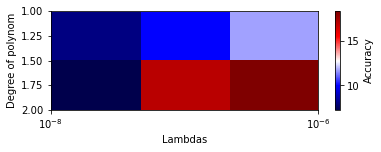

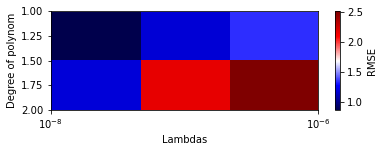

[[ 8.1132 10.0496 11.7848]
 [ 7.2572 17.0508 18.32  ]]
[[0.87442747 1.1898527  1.3593061 ]
 [1.1982421  2.17968351 2.51519202]]


In [705]:
plt.subplot(211)
plt.imshow(accuracy_LR, extent=[lambdas[0],lambdas[-1], degrees[-1],degrees[0]],aspect = 'auto',cmap ='seismic')
plt.xlabel('Lambdas')
plt.ylim([degrees[-1],degrees[0]])
plt.xscale('symlog')
plt.ylabel('Degree of polynom')
plt.colorbar(label = 'Accuracy')
plt.show()

plt.subplot(212)
plt.imshow(rmses_LR, extent=[lambdas[0],lambdas[-1], degrees[-1],degrees[0]],aspect = 'auto',cmap ='seismic')
plt.xlabel('Lambdas')
plt.ylim([degrees[-1],degrees[0]])
plt.xscale('symlog')
plt.ylabel('Degree of polynom')
plt.colorbar(label = 'RMSE')
plt.show()

print(accuracy_LR)
print(rmses_LR)

In [712]:
#########
# Test LR
#########


degree = 1
lambda_ = 1e-7
max_iters = 6000


param = {
  "model": "LR",
}


x_tr, x_te, y_tr, y_te = split_data(tX_post, y_post, 0.8, seed=1)

y_tr = (y_tr + 1)/2
y_te = (y_te + 1)/2

x_tr_p = build_poly(x_tr, degree)
x_te_p = build_poly(x_te, degree)

initial_w = np.zeros(x_tr_p.shape[1])

w, mse = logistic_regression(y_tr, x_tr_p, initial_w, max_iters, gamma)
accuracy = compute_accuracy(x_te_p, y_te, w, param)

print("Test model : ", param["model"], "degree = ", degree, "accuracy = ", accuracy, "RMSE =", np.sqrt(2*mse))

# Test model :  ridge degree =  7 accuracy =  81.73 RMSE = 0.7361361014872653




Test model :  LR degree =  1 accuracy =  40.066 RMSE = nan


<ipython-input-712-f313a59231eb>:29: RuntimeWarning: invalid value encountered in sqrt
  print("Test model : ", param["model"], "degree = ", degree, "accuracy = ", accuracy, "RMSE =", np.sqrt(2*mse))


In [255]:
################
# CV log reg
###############


def CV_LR(degrees, gammas, max_iters, k_fold, seed = 1):
    
    # Split data in k fold
    k_indices = build_k_indices(y_pre, k_fold, seed)

    # For each degree, store :
    best_param = []
#     best_rmses = []
    best_accuracy = []
    
    parameters_LR = {
      "model": "LR",
      "param": [0, max_iters],
    }

    # Vary degree
    for i, degree in enumerate(degrees):

        print("Progress : ", i/len(degrees)*100 , " % ")
       
        parameters_LR["initial_w"] = np.ones(int(tX_post.shape[1] * degree + 1))
        
        # Contains the rmse/accuracy for 1 degree and all gammas
#         rmse_gamma = []
        accuracy_gamma = []
        
        for gamma in gammas:
            
            parameters_LR["param"][0] = gamma
            
            # Contains rmse or accuracy for each k_fold
#             rmse_te_tmp = []
            accuracy_tmp = []
            
            for k in range(k_fold):
                _, _, _, accuracy = cross_validation(y_pre, tX_post, k_indices, k, parameters_LR, degree)
#                 rmse_te_tmp.append(rmse_te)
                accuracy_tmp.append(accuracy)

#             rmse_gamma.append(np.mean(rmse_te_tmp))
            accuracy_gamma.append(np.mean(accuracy_tmp))
        
#         idx_best_gamma =  np.argmin(rmse_gamma)
        idx_best_gamma =  np.argmax(accuracy_gamma)
        best_param.append(gammas[idx_best_gamma])
#         best_rmses.append(rmse_gamma[idx_best_gamma])
        best_accuracy.append(accuracy_gamma[idx_best_gamma])


#     idx_best_degree =  np.argmin(best_rmses)
    idx_best_degree =  np.argmax(best_accuracy)



    return idx_best_degree, best_param, best_accuracy#, best_rmses




In [260]:
from implementations import * 
from proj1_helpers import *

DATA_TRAIN_PATH = '/Users/ines/Documents/SV/SV-MA3/ML_course/projects/project1/data/train.csv' 
y_pre, tX_pre, ids = load_csv_data(DATA_TRAIN_PATH)

tX_post = remove_undefined_variable(tX_pre)
tX_post, y_post = remove_aberrant_features(tX_post, y_pre)
tX_post = tX_post - np.min(tX_post)/(np.max(tX_post)- np.min(tX_post))

degrees = np.linspace(1, 2, 2)
gammas = np.logspace(-6, -5, 2)
k_fold = 5
max_iters = 200

# idx_best_degree_LR, best_param_LR, best_accuracy_LR, best_rmses_LR = CV_LR(degrees, gammas, max_iters, k_fold, seed = 1)
idx_best_degree_LR, best_param_LR, best_accuracy_LR = CV_LR(degrees, gammas, max_iters, k_fold, seed = 1)

Progress :  0.0  % 
Progress :  50.0  % 


The best degree is : 1.0
The best gamma is : 1e-06
[56.1244, 45.72760000000001]


Text(0, 0.5, 'Accuracy in %')

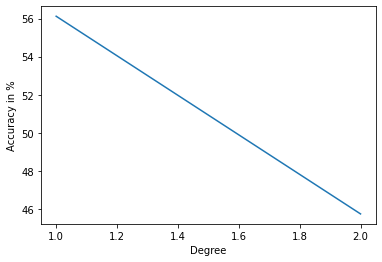

In [261]:
print("The best degree is :", degrees[idx_best_degree_LR])
print("The best gamma is :", best_param_LR[idx_best_degree_LR])
# print(best_rmses_LR)
print(best_accuracy_LR)

# fig, ax1 = plt.subplots()

# ax2 = ax1.twinx()
# stop = 10
# ax1.plot(degrees[:stop], best_rmses_LR[:stop], 'g-')
# ax2.plot(degrees[:stop], best_accuracy_LR[:stop], 'b-')

# ax1.set_xlabel('Degree')
# ax1.set_ylabel('RMSE', color='g')
# ax2.set_ylabel('Accuracy in %', color='b')

# plt.show()

plt.plot(degrees, best_accuracy_LR)
plt.xlabel('Degree')
plt.ylabel('Accuracy in %')

In [ ]:
################
# CV reg log reg
###############

degrees = np.linspace(7, 13, 7)
lambdas = np.logspace(-4, 0, 5)
gamma = 0.0001
k_fold = 5
max_iters = 200

parameters_REG_LR = {
      "model": "REG_LR",
      "param": [lambdas, max_iters, gammas],
}

rmses_ridge, accuracy_ridge =  best_degree_selection(degrees, k_fold, parameters_REG_LR, seed = 1)



In [177]:
################
# CV reg log reg
###############


def CV_REG_LR(degrees, gamma, lambdas, max_iters, k_fold, seed = 1):
    
    # Split data in k fold
    k_indices = build_k_indices(y_pre, k_fold, seed)

    # For each degree, store :
    best_param = []
#     best_rmses = []
    best_accuracy = []
    
    parameters_REG_LR = {
      "model": "REG_LR",
      "param": [0, max_iters, gamma],
    }

    # Vary degree
    for i, degree in enumerate(degrees):

        print("Progress : ", i/len(degrees)*100 , " % ")
       
        parameters_REG_LR["initial_w"] = np.ones(int(tX_post.shape[1] * degree + 1))
        
        # Contains the rmse/accuracy for 1 degree and all gammas
#         rmse_gamma = []
        accuracy_lambda = []
        
        for lambda_ in lambdas:
            
            parameters_REG_LR["param"][0] = lambda_
            
            # Contains rmse or accuracy for each k_fold
#             rmse_te_tmp = []
            accuracy_tmp = []
            
            for k in range(k_fold):
                _, _, _, accuracy = cross_validation(y_pre, tX_post, k_indices, k, parameters_REG_LR, degree)
#                 rmse_te_tmp.append(rmse_te)
                accuracy_tmp.append(accuracy)

#             rmse_gamma.append(np.mean(rmse_te_tmp))
            accuracy_lambda.append(np.mean(accuracy_tmp))
        
#         idx_best_gamma =  np.argmin(rmse_gamma)
        idx_best_lambda =  np.argmax(accuracy_lambda)
        best_param.append(lambdas[idx_best_lambda])
#         best_rmses.append(rmse_gamma[idx_best_gamma])
        best_accuracy.append(accuracy_lambda[idx_best_lambda])


#     idx_best_degree =  np.argmin(best_rmses)
    idx_best_degree =  np.argmax(best_accuracy)



    return idx_best_degree, best_param, best_accuracy#, best_rmses





In [ ]:
degrees = np.linspace(7, 13, 7)
lambdas = np.logspace(-4, 0, 5)
gamma = 0.0001
k_fold = 5
max_iters = 200

idx_best_degree_reg_LR, best_param_reg_LR, best_accuracy_reg_LR = CV_REG_LR(degrees, gamma, lambdas, max_iters, k_fold, seed = 1)

The best degree is : 7.0
The best gamma is : 0.0001
[57.404399999999995, 45.2808, 56.0492, 44.8988, 54.72760000000001, 44.4964, 53.74000000000001]


Text(0, 0.5, 'Accuracy in %')

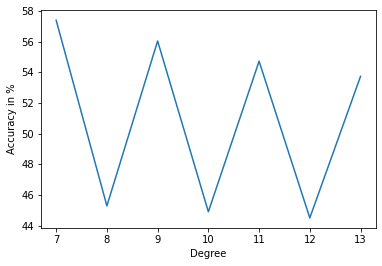

In [179]:
print("The best degree is :", degrees[idx_best_degree_reg_LR])
print("The best gamma is :", gammas[idx_best_degree_reg_LR])
print(best_accuracy_reg_LR)

plt.plot(degrees, best_accuracy_reg_LR)
plt.xlabel('Degree')
plt.ylabel('Accuracy in %')

In [472]:
from implementations import *

jet = categorizing(tX_pre)

parameters_LS = {
  "model": "LS",
}

num_row = len(jet)
num_col = 1
accuracies_all = []


for i in range(len(jet)) :
    tX_jet = clear_jet(tX_post[jet[i]])

    x_tr, x_te, y_tr, y_te = split_data(tX_jet, y_post[jet[i]], 0.8, seed=1)
    degrees = np.linspace(1, 20, 20)
    accuracies_d = []


    for d in degrees:
        idx = int(d-1)

        # form data with polynomial degree:
        x_tr_p = build_poly(x_tr, d)
        x_te_p = build_poly(x_te, d)

        w_list, mse_list = least_squares(y_tr, x_tr_p)
        accuracies_d.append(compute_accuracy(x_te_p, y_te, w_list, parameters_LS))
        
    accuracies_all.append(accuracies_d)


(99913, 18)
(77544, 22)
(50379, 29)
(22164, 29)


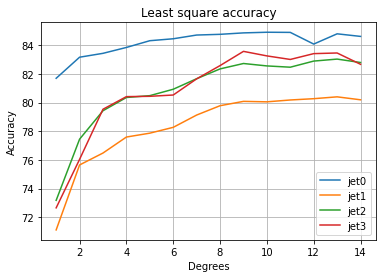

In [734]:
degrees = np.linspace(1, 20, 20)
stop = 14
for i, acc in enumerate(accuracies_all):
    lab = "jet" + str(i)
    plt.plot(degrees[:stop], acc[:stop], label = lab)
    plt.xlabel("Degrees")
    plt.ylabel("Accuracy")
    plt.title("Least square accuracy")
    plt.legend() 
    plt.grid(True)

In [713]:
jet = categorizing(tX_pre)

#########
# Ridge
#########

degrees = np.linspace(5, 9, 5)
lambdas = np.logspace(-3, -1, 3)
k_fold = 5


rmse_all_ridge = []
accuracy_all_ridge = []


for i in range(len(jet)):
    
    parameters_ridge = {
      "model": "ridge",
      "param": lambdas,
    }
    
    tX_jet = clear_jet(tX_post[jet[i]])
    y_jet = y_post[jet[i]]
    
    rmses_ridge, accuracy_ridge = best_degree_selection(tX_jet, y_jet, degrees, k_fold, parameters_ridge, seed = 1)
    
    rmse_all_ridge.append(rmses_ridge)
    accuracy_all_ridge.append(accuracy_ridge)

# LS
# 84.91217534904669

# 80.40492617190019

# 83.03890432711394

# 83.57771260997067


Method =  ridge
Degree =  5.0
Progress :  0.0  % 
Degree =  6.0
Progress :  20.0  % 
Degree =  7.0
Progress :  40.0  % 
Degree =  8.0
Progress :  60.0  % 
Degree =  9.0
Progress :  80.0  % 
The method used is :  ridge
The best degree is 7.0  best parameter is 0.01  with RMSE =  0.6818233872251062 and accuracy =  84.23280952857571
Method =  ridge
Degree =  5.0
Progress :  0.0  % 
Degree =  6.0
Progress :  20.0  % 
Degree =  7.0
Progress :  40.0  % 
Degree =  8.0
Progress :  60.0  % 
Degree =  9.0
Progress :  80.0  % 
The method used is :  ridge
The best degree is 9.0  best parameter is 0.001  with RMSE =  0.7540271984175535 and accuracy =  80.7389734330668
Method =  ridge
Degree =  5.0
Progress :  0.0  % 
Degree =  6.0
Progress :  20.0  % 
Degree =  7.0
Progress :  40.0  % 
Degree =  8.0
Progress :  60.0  % 
Degree =  9.0
Progress :  80.0  % 
The method used is :  ridge
The best degree is 9.0  best parameter is 0.001  with RMSE =  0.7097834561237694 and accuracy =  83.44615384615383
Met

In [715]:
################
# Ridge - jet 0
################

degrees = np.linspace(6, 8, 3)
lambdas = np.logspace(-3, -1, 3)
k_fold = 5

parameters_ridge = {
      "model": "ridge",
      "param": lambdas,
    }
    
tX_jet = clear_jet(tX_post[jet[0]])
y_jet = y_post[jet[0]]

rmses_ridge_j0, accuracy_ridge_j0 = best_degree_selection(tX_jet, y_jet, degrees, k_fold, parameters_ridge, seed = 1)
# The best degree is 6.0  best parameter is 0.31622776601683794  with RMSE =  435046.66358674224 and accuracy =  81.63146832148934

Method =  ridge
Degree =  6.0
Progress :  0.0  % 
Degree =  7.0
Progress :  33.33333333333333  % 
Degree =  8.0
Progress :  66.66666666666666  % 
The method used is :  ridge
The best degree is 7.0  best parameter is 0.01  with RMSE =  0.6818233872251062 and accuracy =  84.23280952857571


In [717]:
################
# Ridge - jet 1
################

degrees = np.linspace(8, 10, 3)
lambdas = np.logspace(-5, -2, 4)
k_fold = 5

parameters_ridge = {
      "model": "ridge",
      "param": lambdas,
    }
    
tX_jet = clear_jet(tX_post[jet[1]])
y_jet = y_post[jet[1]]

rmses_ridge_j1, accuracy_ridge_j1 = best_degree_selection(tX_jet, y_jet, degrees, k_fold, parameters_ridge, seed = 1)
# The best degree is 6.0  best parameter is 0.001  with RMSE =  0.821468270984183 and accuracy =  78.38277018313127

Method =  ridge
Degree =  8.0
Progress :  0.0  % 
Degree =  9.0
Progress :  33.33333333333333  % 
Degree =  10.0
Progress :  66.66666666666666  % 
The method used is :  ridge
The best degree is 10.0  best parameter is 0.0001  with RMSE =  0.7534354637147971 and accuracy =  80.76089760123806


In [718]:
################
# Ridge - jet 2
################

degrees = np.linspace(8, 10, 3)
lambdas = np.logspace(-5, -2, 4)
k_fold = 5

parameters_ridge = {
      "model": "ridge",
      "param": lambdas,
    }
    
tX_jet = clear_jet(tX_post[jet[2]])
y_jet = y_post[jet[2]]

rmses_ridge_j2, accuracy_ridge_j2 = best_degree_selection(tX_jet, y_jet, degrees, k_fold, parameters_ridge, seed = 1)

Method =  ridge
Degree =  8.0
Progress :  0.0  % 
Degree =  9.0
Progress :  33.33333333333333  % 
Degree =  10.0
Progress :  66.66666666666666  % 
The method used is :  ridge
The best degree is 10.0  best parameter is 0.0001  with RMSE =  0.7091928050339128 and accuracy =  83.43424317617867


In [719]:
################
# Ridge - jet 3
################

degrees = np.linspace(8, 10, 3)
lambdas = np.logspace(-5, -2, 4)
k_fold = 5

parameters_ridge = {
      "model": "ridge",
      "param": lambdas,
    }
    
tX_jet = clear_jet(tX_post[jet[3]])
y_jet = y_post[jet[3]]

rmses_ridge_j3, accuracy_ridge_j3 = best_degree_selection(tX_jet, y_jet, degrees, k_fold, parameters_ridge, seed = 1)

Method =  ridge
Degree =  8.0
Progress :  0.0  % 
Degree =  9.0
Progress :  33.33333333333333  % 
Degree =  10.0
Progress :  66.66666666666666  % 
The method used is :  ridge
The best degree is 10.0  best parameter is 0.001  with RMSE =  0.7185560988205199 and accuracy =  83.51985559566786


## Generate predictions and save ouput in csv format for submission:

In [250]:
DATA_TEST_PATH = '/Users/ines/Documents/SV/SV-MA3/ML_course/projects/project1/data/test.csv' # TODO: download test data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [252]:
OUTPUT_PATH = '/Users/ines/Documents/SV/SV-MA3/ML_course/projects/project1/data/sample-submission.csv' # TODO: fill in desired name of output file for submission
# weights, _ = ridge_regression(y_post, tX_post, 0.001)
# print(tX_test.shape)
# tX_test = np.delete(tX_test, 22, 1)
# tX_test.shape
y_pred = predict_labels(weights, tX_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)